# Step 1
- Create network of characters
- Calculate centrality measures
- Detect communities

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams
from pyvis.network import Network

In [2]:
# SET VIZ TEMPLATE
# colors
YELLOW='yellow'
BLACK='#1a1a1a'
GREY='#696969'
WHITE='white'

# fonts
futura_font_path = 'graphfonts/Futura/futura-medium-condensed.ttf'
FUTURA = fm.FontProperties(fname=futura_font_path)

paypal_font_path = 'graphfonts/Paypal/PayPalSansSmall-Regular.ttf'
PAYPAL = fm.FontProperties(fname=paypal_font_path)

DPI=200

In [3]:
sheets = ['episode1', 'episode2', 'episode3', 'episode4', 'episode5', 'episode6']
data = pd.concat([pd.read_excel('data.xlsx', sheet_name = sheet) for sheet in sheets])
data

,initiator,responder,dialogue
0,PASSENGER 1,SHANE,You headed home? Yeah We were at the Amanari. ...
1,OLIVIA,PAULA,"Oh my God, who are these people? So, these tw..."
2,NICOLE,OLIVIA,"Hey, girls. What, Mom? Liv, come up front. I..."
3,ARMOND,LANI,"Here they come. Wave, Lani. There we are. Wa..."
4,BELINDA,NICOLE,Welcome. Thank you.
...,...,...,...
102,RACHEL,BELINDA,"I mean, I was always gonna live life on my own..."
103,SHANE,SHANE,"What the– Oh, oh, fuck. Oh, oh, fuck."
104,SHANE,RECEPTIONIST,"Yeah, I have a message. She got her own room. ..."
105,SHANE,ARMOND,"Oh, God. Oh, fuck. Oh, fuck. Oh, Jesus Christ...."


In [4]:
# clean data
df = (data
     .assign(sorted_pairs=lambda df_: df_.apply(lambda df_: '-'.join(sorted([df_['initiator'], df_['responder']])), axis=1))
     .assign(weight=lambda df_: df_.groupby(['sorted_pairs'])['sorted_pairs'].transform('count'))
     .assign(dialogue=lambda df_: df_.groupby(['sorted_pairs'])['dialogue'].transform(lambda df_: ' '.join(df_.unique())))
     .drop_duplicates('sorted_pairs')
     .drop(columns='sorted_pairs')
    )

In [5]:
# create network
G = nx.from_pandas_edgelist(df, source='initiator', target='responder', edge_attr=['dialogue', 'weight'])

In [6]:
# show nodes in network
G.nodes

NodeView(('PASSENGER 1', 'SHANE', 'OLIVIA', 'PAULA', 'NICOLE', 'ARMOND', 'LANI', 'BELINDA', 'RACHEL', 'TANYA', 'QUINN', 'DARRELL', 'MARK', 'DILLON', 'CHRISTIE', 'DR REZZ', 'NURSE', 'MR FERRER', 'BARTENDER', 'KITTY', 'LORENZO', 'HUTCH', 'STAFF MEMBER 1', 'FAMILY', 'CHARLIE', 'BELINDA’S SON', "RACHEL'S MOM", 'DECKHAND', 'GUEST', 'KAI', 'GREG', 'CANOEIST 2', 'WAITRESS', 'CANOEIST 1', 'FACIALIST', 'HOTEL GUEST', 'JOHN', 'RECEPTIONIST'))

In [7]:
# show edges
G.edges

EdgeView([('PASSENGER 1', 'SHANE'), ('SHANE', 'RACHEL'), ('SHANE', 'ARMOND'), ('SHANE', 'LANI'), ('SHANE', 'KITTY'), ('SHANE', 'DILLON'), ('SHANE', 'OLIVIA'), ('SHANE', 'PAULA'), ('SHANE', 'TANYA'), ('SHANE', 'BELINDA'), ('SHANE', 'SHANE'), ('SHANE', 'MARK'), ('SHANE', 'NICOLE'), ('SHANE', 'LORENZO'), ('SHANE', 'BARTENDER'), ('SHANE', 'RECEPTIONIST'), ('OLIVIA', 'PAULA'), ('OLIVIA', 'NICOLE'), ('OLIVIA', 'RACHEL'), ('OLIVIA', 'QUINN'), ('OLIVIA', 'MARK'), ('OLIVIA', 'TANYA'), ('OLIVIA', 'STAFF MEMBER 1'), ('OLIVIA', 'ARMOND'), ('OLIVIA', 'KAI'), ('PAULA', 'NICOLE'), ('PAULA', 'RACHEL'), ('PAULA', 'QUINN'), ('PAULA', 'MARK'), ('PAULA', 'TANYA'), ('PAULA', 'ARMOND'), ('PAULA', 'KAI'), ('NICOLE', 'BELINDA'), ('NICOLE', 'ARMOND'), ('NICOLE', 'QUINN'), ('NICOLE', 'MARK'), ('NICOLE', 'NICOLE'), ('NICOLE', 'RACHEL'), ('NICOLE', 'TANYA'), ('NICOLE', 'KAI'), ('NICOLE', 'HUTCH'), ('NICOLE', 'FAMILY'), ('ARMOND', 'LANI'), ('ARMOND', 'RACHEL'), ('ARMOND', 'TANYA'), ('ARMOND', 'BELINDA'), ('ARMOND'

In [8]:
# count edges
len(G.edges)

92

In [9]:
# see network
net = Network(notebook=True, cdn_resources='remote', width='1000px', height='700px', bgcolor=BLACK, font_color=YELLOW)

node_degree = dict(G.degree)

# set node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show('TWL.html')

### Centrality Measures

In [10]:
# show degree centrality
degree_df = pd.DataFrame.from_dict(nx.degree_centrality(G), orient='index', columns=['degree']).sort_values('degree', ascending=True)
# degree_df

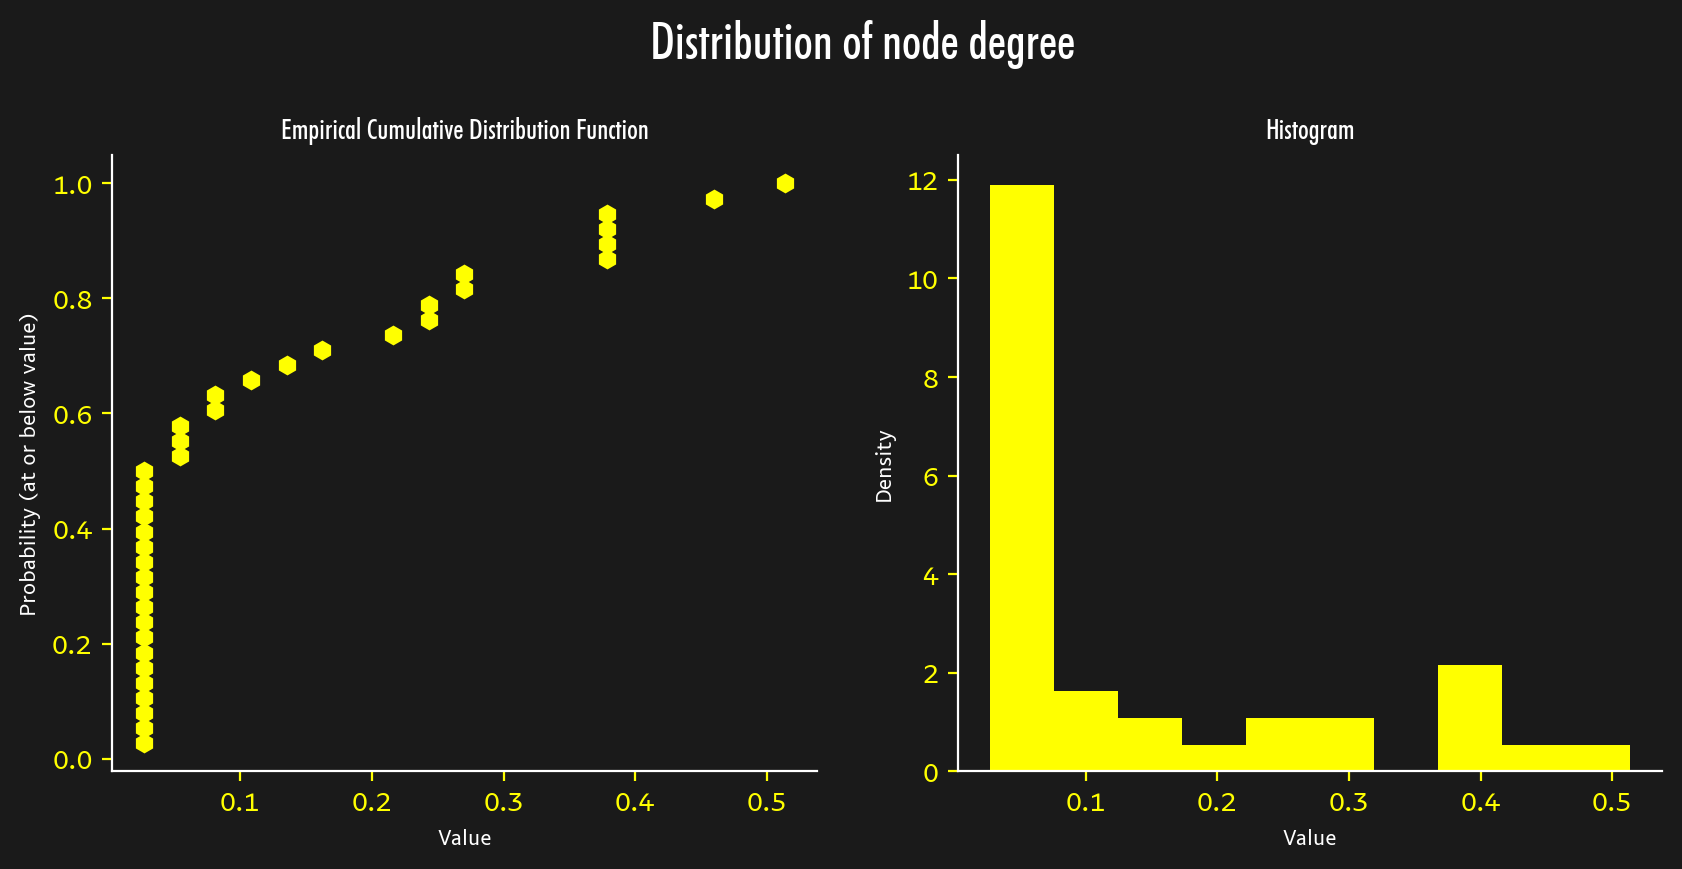

In [11]:
# plot degree distribution
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), facecolor=BLACK, dpi=DPI)
ax1.tick_params(axis='both', colors=YELLOW, labelsize=10)
ax1.set_facecolor(BLACK)
ax1.set_title('Empirical Cumulative Distribution Function', fontproperties=FUTURA, color=WHITE)
ax1.set_xlabel('Value', fontproperties=PAYPAL, color=WHITE, fontsize=8)
ax1.set_ylabel('Probability (at or below value)', fontproperties=PAYPAL, color=WHITE, fontsize=8)

ax2.tick_params(axis='both', colors=YELLOW, labelsize=10)
ax2.set_facecolor(BLACK)
ax2.set_title('Histogram', fontproperties=FUTURA, color=WHITE)
ax2.set_xlabel('Value', fontproperties=PAYPAL, color=WHITE, fontsize=8)
ax2.set_ylabel('Density', fontproperties=PAYPAL, color=WHITE, fontsize=8)

for label in ax1.get_xticklabels()+ax2.get_xticklabels():
    label.set_fontproperties(PAYPAL)
    label.set_fontsize(10)
    label.set_color(YELLOW)

for label in ax1.get_yticklabels():
    label.set_fontproperties(PAYPAL)
    label.set_fontsize(10)
    label.set_color(YELLOW)

for label in ax2.get_yticklabels():
    label.set_fontproperties(PAYPAL)
    label.set_fontsize(10)
    label.set_color(YELLOW)

# set spine color
for ax in [ax1, ax2]:
    ax.spines['bottom'].set_color(WHITE)
    ax.spines['left'].set_color(WHITE)

# Set the visibility of the spines on the top and left to off
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Calculate the ECDF and plot it on the left subplot
x = np.sort(degree_df)
y = np.arange(1, len(degree_df)+1) / len(degree_df)
ax1.plot(x, y, marker='h', linestyle='none', color=YELLOW)

# Plot the histogram on the right subplot
ax2.hist(degree_df, bins=10, density=True, color=YELLOW)

# Add a centered supertitle to represent both plots
fig.suptitle('Distribution of node degree', fontsize=18, fontweight='bold', fontproperties=FUTURA, color=WHITE, y=1.05)

# Show the plot
plt.show()

ECDF stands for Empirical Cumulative Distribution Function. It is a non-parametric estimator of the cumulative distribution function (CDF) of a random variable based on a sample of the data.

To construct the ECDF, we first sort the observations in our sample from smallest to largest. Then, for each observation, we calculate the proportion of the observations that are less than or equal to it, which gives us the cumulative probability of that observation. Finally, we plot these cumulative probabilities against the sorted observations to create the ECDF.

The ECDF is a useful tool for visualizing the distribution of a dataset, especially when we don't know the underlying distribution of the data. It provides a way to estimate the probability of observing a value less than or equal to a particular value in the data, which can be used for statistical inference, hypothesis testing, and model selection.

3

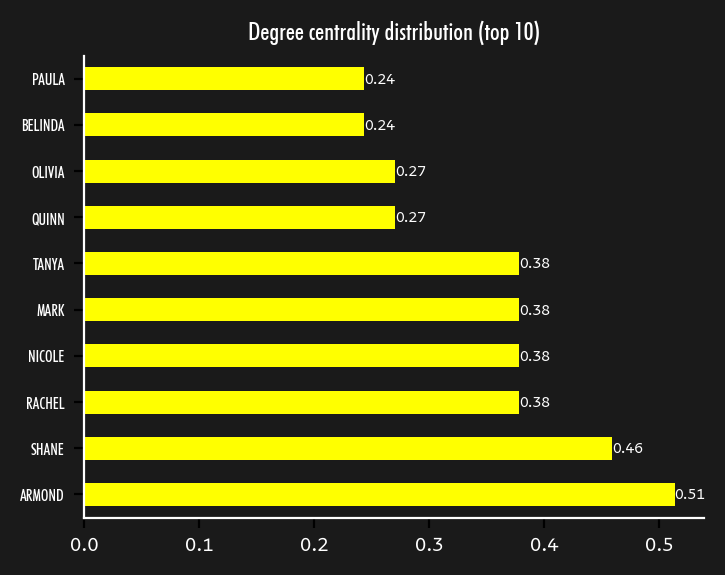

In [12]:
# func to creat bar plot
def plot_bar(df, sort_value, title):
    fig, ax = plt.subplots(figsize=(4,3), dpi=DPI, facecolor=BLACK)

    plt.title(title, fontproperties=FUTURA, color=WHITE, fontsize=9)

    ax.set_facecolor(BLACK)

    for label in ax.get_xticklabels():
        label.set_fontproperties(PAYPAL)
        label.set_fontsize(7)
        label.set_color(WHITE)

    for label in ax.get_yticklabels():
        label.set_fontproperties(FUTURA)
        label.set_fontsize(5.5)
        label.set_color(WHITE)
        
    for side in 'bottom,left'.split(','):
        ax.spines[side].set_edgecolor(WHITE)
        
    for side in 'top,right'.split(','):
        ax.spines[side].set_visible(False)

    plot = df.sort_values(sort_value, ascending=False)[0:10].plot.barh(ax=ax, legend=False, color=YELLOW)

    for i, value in enumerate(df.sort_values(sort_value, ascending=False)[0:10][sort_value]):
        ax.text(value, i, str(round(value,2)), fontproperties=PAYPAL, color=WHITE, va='center', fontsize=5.5)

    return plot

plot_bar(degree_df, sort_value='degree', title='Degree centrality distribution (top 10)');3

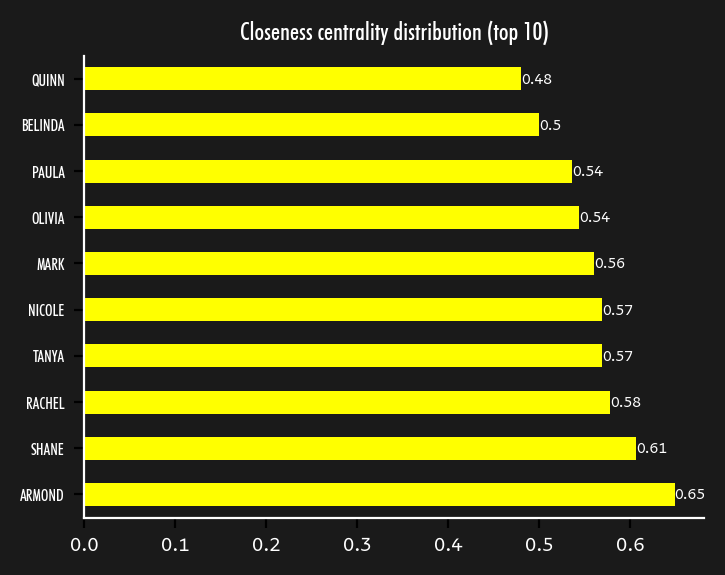

In [13]:
# show degree centrality
closeness_df = pd.DataFrame.from_dict(nx.closeness_centrality(G), orient='index', columns=['closeness'])
plot_bar(closeness_df, sort_value='closeness', title='Closeness centrality distribution (top 10)');

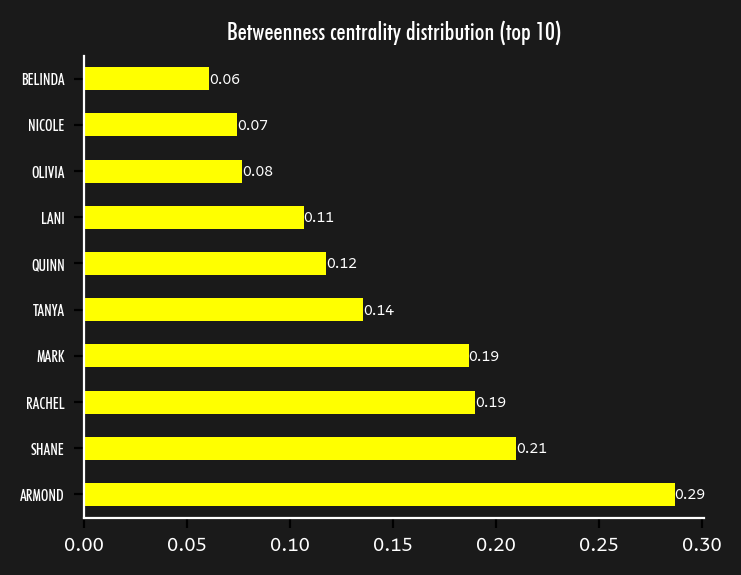

In [14]:
# show betweeness centrality
betweenness_df = pd.DataFrame.from_dict(nx.betweenness_centrality(G), orient='index', columns=['betweenness'])
plot_bar(betweenness_df, sort_value='betweenness', title='Betweenness centrality distribution (top 10)');

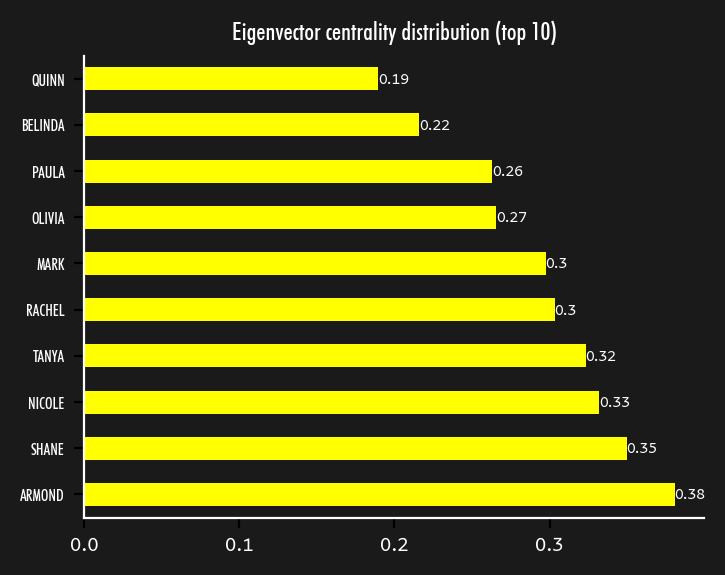

In [15]:
# show eigenvector centrality
eigenvector_df = pd.DataFrame.from_dict(nx.eigenvector_centrality(G), orient='index', columns=['eigenvector'])
plot_bar(eigenvector_df, sort_value='eigenvector', title='Eigenvector centrality distribution (top 10)');

### Clustering coefficient, average path length

In [16]:
# calculate average shortest path length (apl)
apl = nx.average_shortest_path_length(G, weight='weight')
apl

2.4466571834992887

In [17]:
# calculate clustering coefficient (cc)
cc = nx.clustering(G, weight='weight')
cc

{'PASSENGER 1': 0,
 'SHANE': 0.3238095238095238,
 'OLIVIA': 0.6,
 'PAULA': 0.75,
 'NICOLE': 0.5151515151515151,
 'ARMOND': 0.3014705882352941,
 'LANI': 0.4,
 'BELINDA': 0.6190476190476191,
 'RACHEL': 0.3626373626373626,
 'TANYA': 0.4696969696969697,
 'QUINN': 0.35714285714285715,
 'DARRELL': 0,
 'MARK': 0.3939393939393939,
 'DILLON': 1.0,
 'CHRISTIE': 0,
 'DR REZZ': 0,
 'NURSE': 0,
 'MR FERRER': 0,
 'BARTENDER': 0,
 'KITTY': 0.5,
 'LORENZO': 1.0,
 'HUTCH': 0.8333333333333334,
 'STAFF MEMBER 1': 0,
 'FAMILY': 1.0,
 'CHARLIE': 0,
 'BELINDA’S SON': 0,
 "RACHEL'S MOM": 0,
 'DECKHAND': 0,
 'GUEST': 0,
 'KAI': 1.0,
 'GREG': 0,
 'CANOEIST 2': 0,
 'WAITRESS': 0,
 'CANOEIST 1': 0,
 'FACIALIST': 0,
 'HOTEL GUEST': 0,
 'JOHN': 0,
 'RECEPTIONIST': 0}

In [18]:
from tqdm import tqdm

def average_path_length_disconnected(G):
    connected_components = [G.subgraph(c) for c in nx.connected_components(G)]
    avg_path_lengths = [nx.average_shortest_path_length(cc) for cc in connected_components]
    overall_avg_path_length = sum(avg_path_lengths) / len(connected_components)
    return overall_avg_path_length

In [19]:
nx.node_connected_component(G, 'NURSE')

{'ARMOND',
 'BARTENDER',
 'BELINDA',
 'BELINDA’S SON',
 'CANOEIST 1',
 'CANOEIST 2',
 'CHARLIE',
 'CHRISTIE',
 'DARRELL',
 'DECKHAND',
 'DILLON',
 'DR REZZ',
 'FACIALIST',
 'FAMILY',
 'GREG',
 'GUEST',
 'HOTEL GUEST',
 'HUTCH',
 'JOHN',
 'KAI',
 'KITTY',
 'LANI',
 'LORENZO',
 'MARK',
 'MR FERRER',
 'NICOLE',
 'NURSE',
 'OLIVIA',
 'PASSENGER 1',
 'PAULA',
 'QUINN',
 'RACHEL',
 "RACHEL'S MOM",
 'RECEPTIONIST',
 'SHANE',
 'STAFF MEMBER 1',
 'TANYA',
 'WAITRESS'}

In [20]:
import networkx as nx

# Load your network data as a NetworkX graph
# G = nx.read_edgelist('your_network_data.edgelist')

# Calculate the number of nodes and edges in the graph
n = G.number_of_nodes()
m = G.number_of_edges()

# Calculate the average degree of the graph
k = 2 * m / n

# Generate a Watts-Strogatz graph with the same number of nodes, 
# the same average degree, and the same number of edges as the original graph
p = 0.1  # Rewiring probability
WS = nx.watts_strogatz_graph(n, int(k), p)

# Calculate the clustering coefficient and average shortest path length of both graphs
cc_orig = nx.average_clustering(G)
cc_WS = nx.average_clustering(WS)
l_orig = nx.average_shortest_path_length(G)
l_WS = nx.average_shortest_path_length(WS)

# Print the results
print(f'Clustering coefficient of original graph: {cc_orig}')
print(f'Clustering coefficient of Watts-Strogatz graph: {cc_WS}')
print(f'Average shortest path length of original graph: {l_orig}')
print(f'Average shortest path length of Watts-Strogatz graph: {l_WS}')

# Check if the original graph has a higher clustering coefficient and similar average shortest path length 
# compared to the Watts-Strogatz graph, indicating a small world network
if cc_orig > cc_WS and l_orig <= l_WS:
    print('The graph may follow a small world network.')
else:
    print('The graph does not follow a small world network.')


Clustering coefficient of original graph: 0.2743744516577334
Clustering coefficient of Watts-Strogatz graph: 0.3508771929824562
Average shortest path length of original graph: 2.4466571834992887
Average shortest path length of Watts-Strogatz graph: 3.391180654338549
The graph does not follow a small world network.


In [21]:
from tqdm import tqdm

n = G.number_of_nodes()
m = G.number_of_edges()

# Calculate the average degree of the graph
k = 2 * m / n

small_world_measures = []

for p in tqdm(range(0, 10, 1)):
    p = p/10 # rewiring rate
    small_world_graph = nx.watts_strogatz_graph(n, int(k), p, seed=1)
    cc = nx.average_clustering(small_world_graph)
    apl = nx.average_shortest_path_length(small_world_graph)
    small_world_measures.append({'rewiring rate': p, 'clustering coefficient': cc, 'average path length': apl})

small_world_measures


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 250.69it/s]


[{'rewiring rate': 0.0,
  'clustering coefficient': 0.5,
  'average path length': 5.135135135135135},
 {'rewiring rate': 0.1,
  'clustering coefficient': 0.43508771929824563,
  'average path length': 4.079658605974395},
 {'rewiring rate': 0.2,
  'clustering coefficient': 0.3035087719298246,
  'average path length': 3.1066856330014225},
 {'rewiring rate': 0.3,
  'clustering coefficient': 0.29912280701754385,
  'average path length': 2.8961593172119486},
 {'rewiring rate': 0.4,
  'clustering coefficient': 0.2009398496240601,
  'average path length': 2.9246088193456616},
 {'rewiring rate': 0.5,
  'clustering coefficient': 0.1255639097744361,
  'average path length': 2.7226173541963017},
 {'rewiring rate': 0.6,
  'clustering coefficient': 0.16027568922305765,
  'average path length': 2.741109530583215},
 {'rewiring rate': 0.7,
  'clustering coefficient': 0.07969924812030076,
  'average path length': 2.6287339971550496},
 {'rewiring rate': 0.8,
  'clustering coefficient': 0.1343358395989974

In [22]:
def plot_scatter(x, y, x_label, y_label):
    fig, ax = plt.subplots(figsize=(3,2.5), dpi=DPI, facecolor=BLACK)
    ax.tick_params(axis='both', colors=YELLOW, labelsize=10)

    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(PAYPAL)
        label.set_fontsize(7)
        label.set_color(YELLOW)

    for side in 'bottom,left'.split(','):
        ax.spines[side].set_edgecolor(WHITE)

    for side in 'top,right'.split(','):
        ax.spines[side].set_visible(False)

    ax.set_facecolor(BLACK)
    ax.scatter(x, y, c=YELLOW, s=12, marker='h')
    ax.set_xlabel(x_label, fontproperties=PAYPAL, color=WHITE, fontsize=6)
    ax.set_ylabel(y_label, fontproperties=PAYPAL, color=WHITE, fontsize=6)
    plt.show()

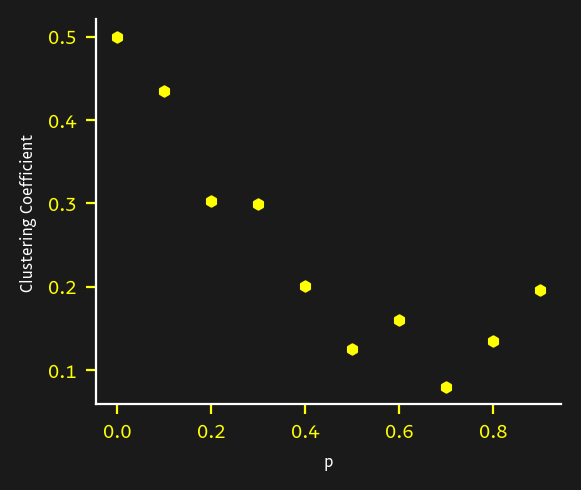

In [23]:
# see if network looks like small world network    
x = [item['rewiring rate'] for item in small_world_measures]
y = [item['clustering coefficient'] for item in small_world_measures]
plot_scatter(x, y, 'p', 'Clustering Coefficient')

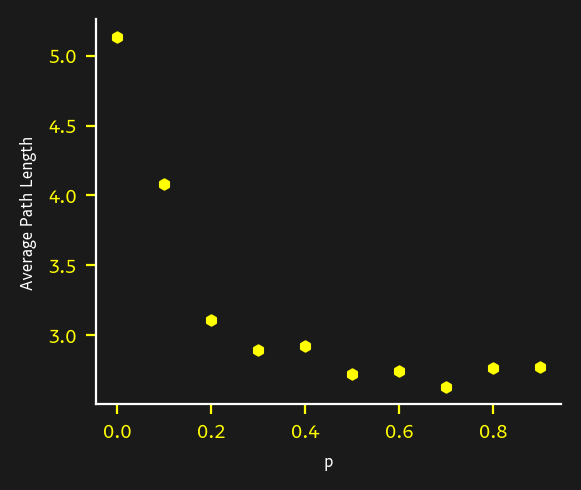

In [24]:
plot_scatter(
    [item['rewiring rate'] for item in small_world_measures],
    [item['average path length'] for item in small_world_measures],
    'p',
    'Average Path Length'
)

The network follows the small world network graph properties.

### Community detection

In [25]:
import community as community_louvain

# create communities
communities = community_louvain.best_partition(G)

# set communities as node
nx.set_node_attributes(G, communities, 'group')

# show network
com_net = Network(notebook=True, cdn_resources='remote', width='1000px', height='700px', bgcolor=BLACK, font_color=YELLOW)
com_net.from_nx(G)
com_net.show('TWL_com.html')